<h1 align='center'> Netflix Data Analysis Grupo 11 <h1>

# Notebook:
1. Se van a explicar paso por paso para el naliciste de este data set

### Importamos las librerias necesarias

In [60]:
import numpy as np # Álgebra lineal y operaciones matemáticas con matrices
import pandas as pd # Procesamiento de datos, especialmente con DataFrames
import matplotlib.pyplot as plt # Visualización de datos (gráficos)
import seaborn as sns  # Visualización de datos estadísticos más atractiva (basado en matplotlib)
import wordcloud # Generación de nubes de palabras

### Loading the Dataset

In [ ]:
netflix=pd.read_csv('../Tratamiento_Datos_Graficos/netflix_titles.csv') # Cargar el dataset de Netflix

#### First 10 values

In [11]:
netflix.head(100) # Mostrar las primeras 100 filas del DataFrame

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
95,81016750,Movie,The 3rd Eye,Rocky Soraya,"Jessica Mila, Denny Sumargo, Citra Prima, Bian...",Indonesia,"September 28, 2018",2018,TV-MA,108 min,"Horror Movies, International Movies",When her little sister claims she sees the dea...
96,81002866,Movie,The Sinking Of Van Der Wijck,Sunil Soraya,"Herjunot Ali, Pevita Pearce, Reza Rahadian, Ra...",Indonesia,"September 28, 2018",2013,TV-14,163 min,"Dramas, International Movies, Romantic Movies",When a young man leaves home to fulfill the wi...
97,80992039,Movie,Two Catalonias,"Álvaro Longoria, Gerardo Olivares",NaN,Spain,"September 28, 2018",2018,TV-MA,117 min,"Documentaries, International Movies",Lawmakers and activists with conflicting ideol...
98,80126507,Movie,Bobby Sands: 66 Days,Brendan Byrne,NaN,"Ireland, United Kingdom","September 28, 2017",2016,TV-14,106 min,Documentaries,"In 1981, an imprisoned Irish Republican Army s..."


#### Ver las dimensiones de filas y columnas

In [13]:
netflix.shape # Ver las dimensiones de filas y columnas

(6234, 12)

In [16]:
netflix.columns # Imprimimos el nombre las de las columnas

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

#### Imprimimos el nombre las de las columnas 

#### Visualixar lo valores vacios del DataSet

In [17]:
netflix.isnull().sum() # Visualixar lo valores vacios del DataSet

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

#### Valores unicos 

In [18]:
netflix.nunique() # Valores unicos

show_id         6234
type               2
title           6172
director        3301
cast            5469
country          554
date_added      1524
release_year      72
rating            14
duration         201
listed_in        461
description     6226
dtype: int64

#### Ver lo valores duplicados

In [19]:
netflix.duplicated().sum() # Ver lo valores duplicados

np.int64(0)

No tenemos valores duplicados en el data set lo que es una ventaja 

#### Hacemos una copia de seguridad de nuestro data set

In [20]:
df = netflix.copy() # Hacemos una copia del DataFrame original para trabajar con él
df.shape # Ver las dimensiones del DataFrame después de la copia

(6234, 12)

### Eliminamos lo valores null para un mejor analicis

In [21]:
df=df.dropna() # Eliminamos los valores null
df.shape # Ver las dimensiones del DataFrame después de eliminar los valores nulos

(3774, 12)

#### Conversion de fechas 

In [24]:
df['date_added'] = df['date_added'].str.strip() # Eliminar espacios en blanco al inicio y al final de la columna 'date_added'
df["date_added"] = pd.to_datetime(df['date_added'], format='mixed') # Convertir la columna 'date_added' a formato de fecha y hora (datetime)
df['day_added'] = df['date_added'].dt.day  # Extraer el día del mes en que se agregó cada título
df['year_added'] = df['date_added'].dt.year # Extraer el año en que se agregó cada título
df['month_added']=df['date_added'].dt.month # Extraer el mes en que se agregó cada título
df['year_added'].astype(int) # (Opcional) Convertir la columna 'year_added' a tipo entero (aunque ya suele serlo)
df['day_added'].astype(int)  # (Opcional) Convertir la columna 'day_added' a tipo entero

0        9
4        8
6        8
7        8
9        8
        ..
6142    30
6158     2
6167    15
6182     9
6213    15
Name: day_added, Length: 3774, dtype: int64

In [ ]:
df.head(10) # Ver la primeras 10 filas 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,9,2019,9
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,8,2017,9
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada",2017-09-08,2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f...",8,2017,9
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,2017-09-08,2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...,8,2017,9
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden",2017-09-08,2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...,8,2017,9
11,70299204,Movie,Kidnapping Mr. Heineken,Daniel Alfredson,"Jim Sturgess, Sam Worthington, Ryan Kwanten, A...","Netherlands, Belgium, United Kingdom, United S...",2017-09-08,2015,R,95 min,"Action & Adventure, Dramas, International Movies","When beer magnate Alfred ""Freddy"" Heineken is ...",8,2017,9
19,80057969,Movie,Love,Gaspar Noé,"Karl Glusman, Klara Kristin, Aomi Muyock, Ugo ...","France, Belgium",2017-09-08,2015,NR,135 min,"Cult Movies, Dramas, Independent Movies",A man in an unsatisfying marriage recalls the ...,8,2017,9
20,80060297,Movie,Manhattan Romance,Tom O'Brien,"Tom O'Brien, Katherine Waterston, Caitlin Fitz...",United States,2017-09-08,2014,TV-14,98 min,"Comedies, Independent Movies, Romantic Movies",A filmmaker working on a documentary about lov...,8,2017,9
21,80046728,Movie,Moonwalkers,Antoine Bardou-Jacquet,"Ron Perlman, Rupert Grint, Robert Sheehan, Ste...","France, Belgium",2017-09-08,2015,R,96 min,"Action & Adventure, Comedies, International Mo...","A brain-addled war vet, a failing band manager...",8,2017,9
23,70304988,Movie,Stonehearst Asylum,Brad Anderson,"Kate Beckinsale, Jim Sturgess, David Thewlis, ...",United States,2017-09-08,2014,PG-13,113 min,"Horror Movies, Thrillers","In 1899, a young doctor arrives at an asylum f...",8,2017,9


# Visualizacion de Graficos

###  ¿Qué tipo de contenido predomina en el catálogo de Netflix: películas (Movie) o series (TV Show)?


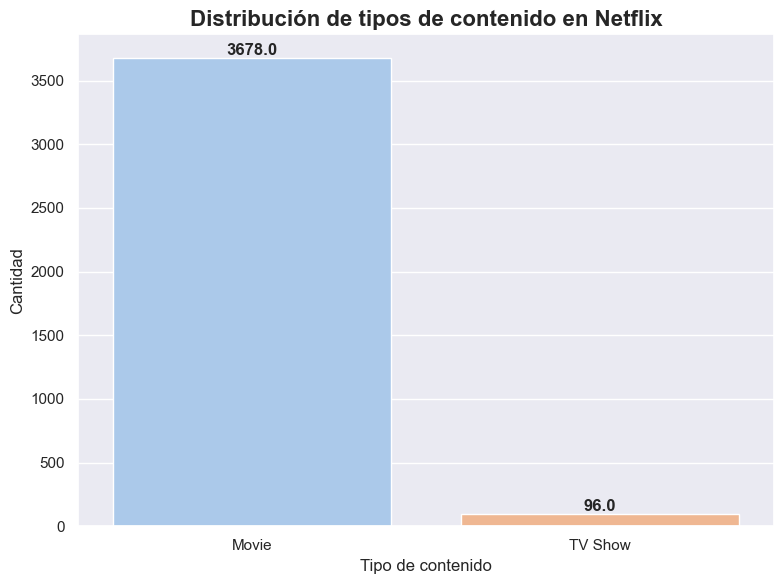

In [40]:
# Estilo visual más atractivo (tema oscuro y limpio)
sns.set_style("darkgrid")

# Crear gráfico de barras para mostrar el número de títulos por tipo (Movie o TV Show)
plt.figure(figsize=(8, 6))  # Ajustar tamaño de la figura (ancho, alto)
ax = sns.countplot(data=df, x='type', hue='type', palette='pastel', legend=False)  # Crear gráfico de barras con paleta de colores 'pastel'
# Título del gráfico
plt.title('Distribución de tipos de contenido en Netflix', fontsize=16, fontweight='bold')

# Etiquetas de los ejes
plt.xlabel('Tipo de contenido', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)

# Mostrar el número exacto sobre cada barra
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=12, fontweight='bold')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

###   ¿Cuál es la cantidad de títulos en Netflix por clasificación de contenido (rating)?

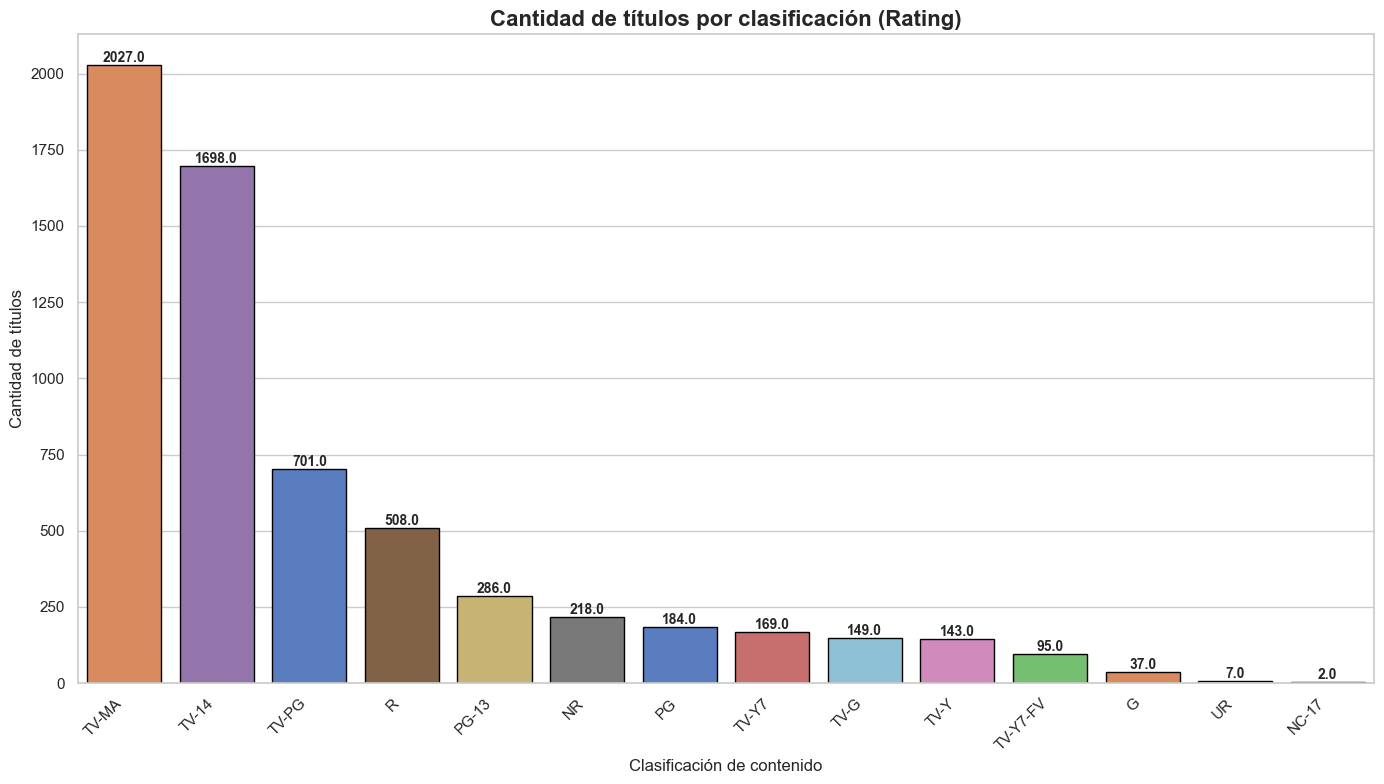

In [38]:
# Estilo general de Seaborn
sns.set(style="whitegrid")

# Ordenar las clasificaciones por frecuencia
rating_order = netflix['rating'].value_counts().index

# Crear figura y ejes
plt.figure(figsize=(14, 8))

# Crear gráfico de barras ordenado
ax = sns.countplot(
    data=netflix,
    x='rating',
    order=rating_order,
    hue='rating',
    palette='muted',
    edgecolor='black',
    legend=False
)

# Añadir etiquetas con el número exacto sobre cada barra
for p in ax.patches:
    count = p.get_height()
    ax.annotate(f'{count}', (p.get_x() + p.get_width() / 2., count),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# Rotar etiquetas del eje X
plt.xticks(rotation=45, ha='right')

# Título y etiquetas
plt.title('Cantidad de títulos por clasificación (Rating)', fontsize=16, fontweight='bold')
plt.xlabel('Clasificación de contenido', fontsize=12)
plt.ylabel('Cantidad de títulos', fontsize=12)

# Ajustar diseño
plt.tight_layout()
plt.show()

### “¿Qué tipo de contenido clasificado es más común en Netflix?”

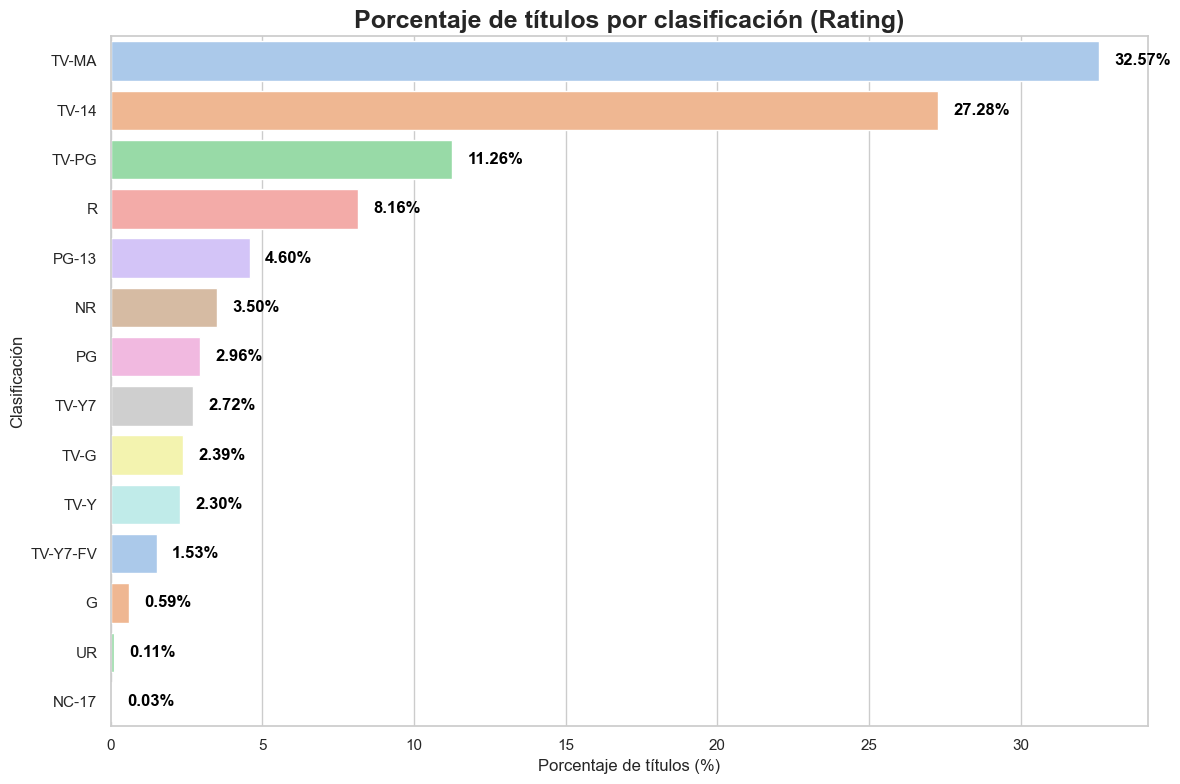

In [41]:
# Gráfico de barras horizontales para mostrar el porcentaje de títulos por clasificación (rating)
# Estilo visual
sns.set(style="whitegrid")

# Contar cuántos títulos hay por clasificación
rating_counts = netflix['rating'].value_counts()
total_ratings = rating_counts.sum()

# Crear la figura
plt.figure(figsize=(12, 8))

# Gráfico de barras horizontales
ax = sns.barplot(
    x=(rating_counts.values / total_ratings) * 100,
    y=rating_counts.index,
    hue=rating_counts.index,
    palette="pastel",
    legend=False
)

# Añadir etiquetas de porcentaje a la derecha de cada barra
for i, v in enumerate(rating_counts.values):
    percentage = (v / total_ratings) * 100
    ax.text(percentage + 0.5, i, f'{percentage:.2f}%', color='black', va='center', fontweight='bold')

# Título y etiquetas
plt.title('Porcentaje de títulos por clasificación (Rating)', fontsize=18, fontweight='bold')
plt.xlabel('Porcentaje de títulos (%)')
plt.ylabel('Clasificación')

# Mostrar
plt.tight_layout()
plt.show()

# WordCloud grafico de palabras

In [61]:
from wordcloud import WordCloud # Generación de nubes de palabras
from itertools import chain # Crear una nube de palabras a partir de los géneros de los títulos
from collections import Counter # Crear una nube de palabras a partir de los géneros de los títulos

##  ¿Cuáles son los países más representados en el catálogo de Netflix?

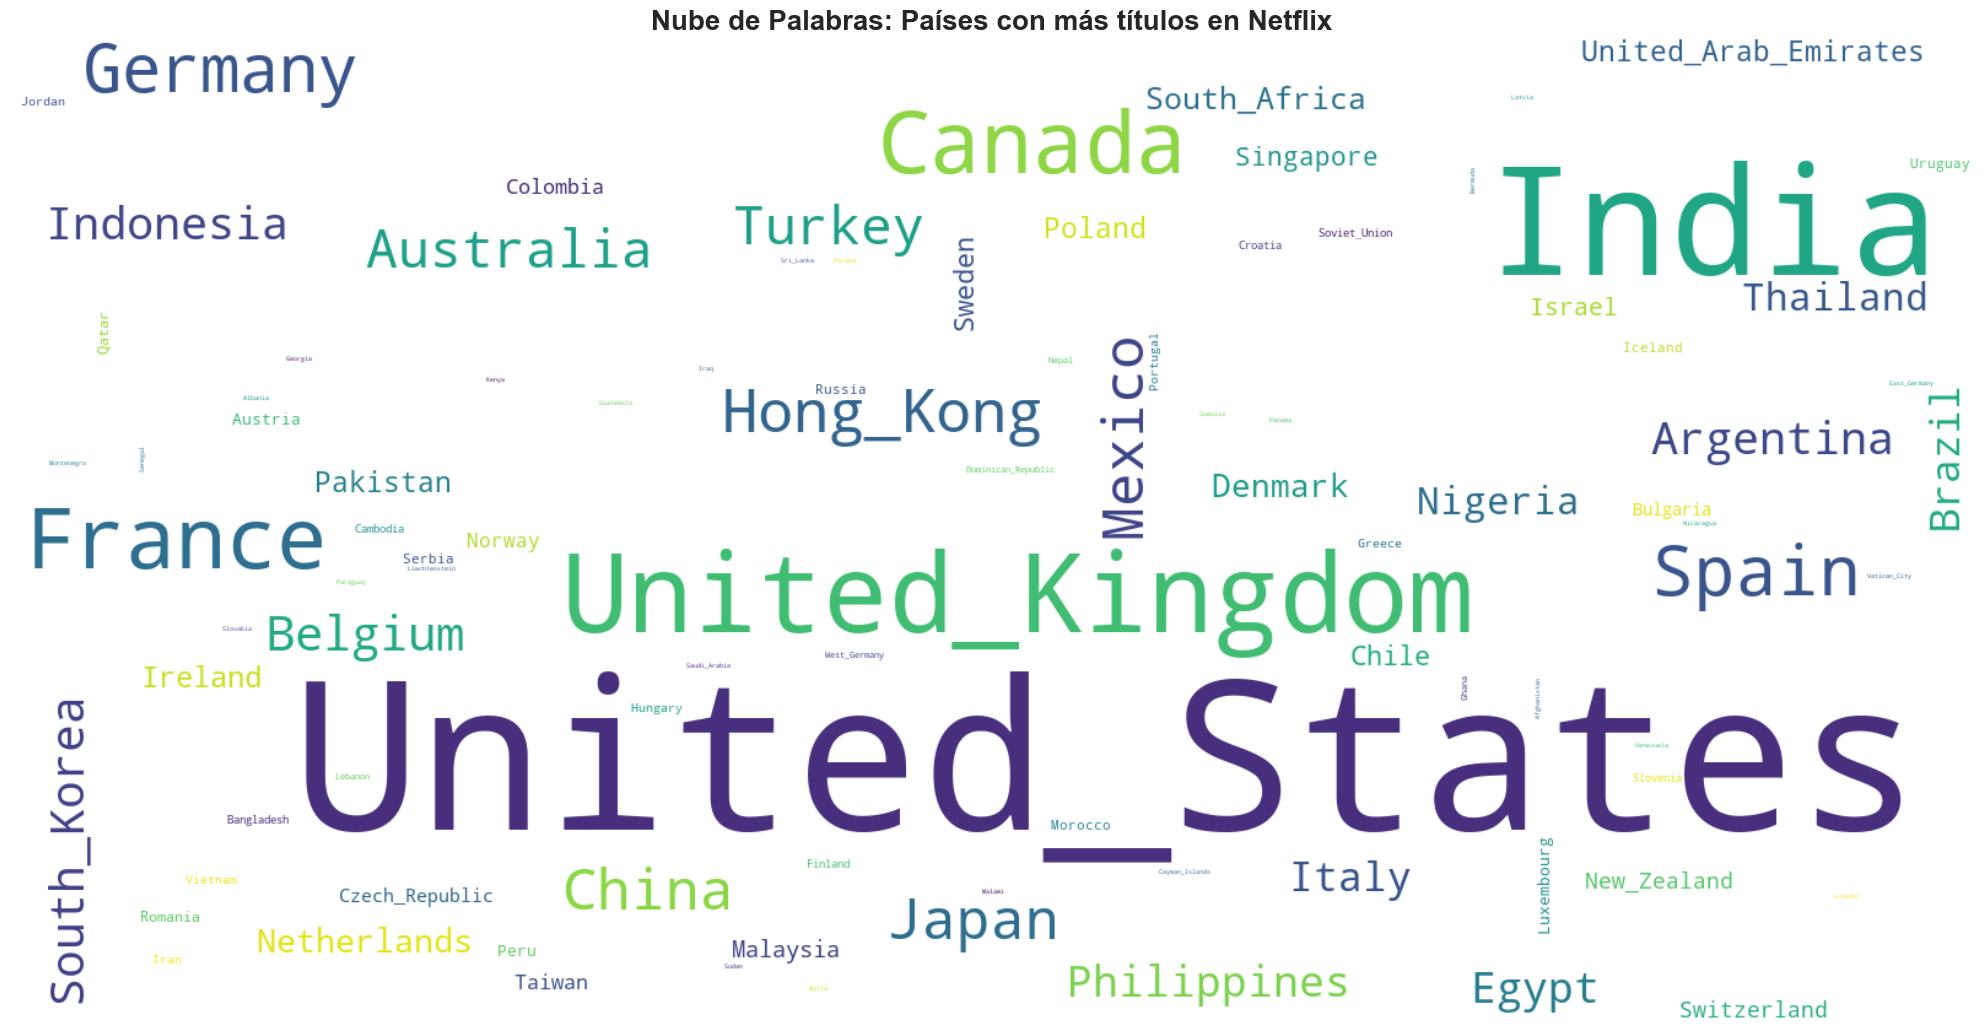

In [62]:
# Crear una nube de palabras para visualizar los países con más títulos en Netflix
# Limpiar datos: eliminar valores nulos y unir todos los países en una sola cadena
# Separar múltiples países y limpiar espacios
countries = df['country'].dropna().str.split(', ')
flattened = list(chain.from_iterable(countries))
cleaned = [c.strip().replace(" ", "_") for c in flattened]

# Contar frecuencia real de cada país
country_counts = Counter(cleaned)

# Crear WordCloud con conteo exacto
wordcloud = WordCloud(
    background_color='white',
    colormap='viridis',
    width=1600,
    height=800,
    max_words=100,
    contour_color='steelblue',
    contour_width=2
).generate_from_frequencies(country_counts)

# Mostrar
plt.figure(figsize=(20, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras: Países con más títulos en Netflix', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()


Análisis de Machine Learning

Construir un modelo de aprendizaje automático para predecir, por ejemplo, el tipo de contenido (película o programa de televisión) basado en las características disponibles

Preprocesamiento de datos

Seleccionar las características relevantes, manejar las características categóricas y dividir los datos para el entrenamiento del modelo.

In [83]:
from sklearn.model_selection import train_test_split  # Importa función para dividir datos en entrenamiento y prueba

netflix=pd.read_csv('../Tratamiento_Datos_Graficos/netflix_titles.csv') # Cargar el dataset de Netflix

df= netflix # Hacer una copia del DataFrame original para trabajar con él

# 1. Seleccionar variables independientes (features) y variable objetivo (target)
X = df[['director', 'cast', 'country', 'rating', 'listed_in']]  # Variables predictoras (todas categóricas)
y = df['type']  # Variable a predecir: si el contenido es 'Movie' o 'TV Show'

# 2. Convertir variables categóricas a variables numéricas con One-Hot Encoding
X = pd.get_dummies(X, columns=['director', 'cast', 'country', 'rating', 'listed_in'])  
# Esto crea columnas binarias (0/1) para cada valor único en esas columnas

# 3. Dividir el dataset en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# test_size=0.2 → el 20% del dataset se usará para evaluación
# random_state=42 → asegura que la división sea reproducible

# 4. Mostrar las dimensiones de los conjuntos resultantes
print("X_train shape:", X_train.shape)  # Dimensión del conjunto de entrenamiento (features)
print("X_test shape:", X_test.shape)    # Dimensión del conjunto de prueba (features)
print("y_train shape:", y_train.shape)  # Número de etiquetas en entrenamiento
print("y_test shape:", y_test.shape)    # Número de etiquetas en prueba


X_train shape: (4987, 9799)
X_test shape: (1247, 9799)
y_train shape: (4987,)
y_test shape: (1247,)


Elegir un modelo de clasificación adecuado de scikit-learn, como la Regresión Logística, un Árbol de Decisión o un Bosque Aleatorio.


In [84]:
from sklearn.ensemble import RandomForestClassifier  # Importa el modelo Random Forest desde scikit-learn

# Crear una instancia del clasificador Random Forest
# random_state=42 asegura que los resultados sean reproducibles (mismo resultado cada vez que corras el modelo)
model = RandomForestClassifier(random_state=42)


Entrene el modelo clasificador Random Forest seleccionado en los datos de entrenamiento.

Razonamiento: El siguiente paso lógico es entrenar el modelo RandomForestClassifier que fue instanciado en la subtarea anterior. Para ello utilizaré el método fit con los datos de entrenamiento (X_train e y_train).

In [85]:
model.fit(X_train, y_train) # Entrenar el modelo con los datos de entrenamiento (X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Evaluar el rendimiento del modelo en los datos de prueba y visualizar los resultados con una matriz de confusión.


Accuracy: 0.9695
Precision (Movie): 0.9830
Recall (Movie): 0.9712
F1-score (Movie): 0.9770


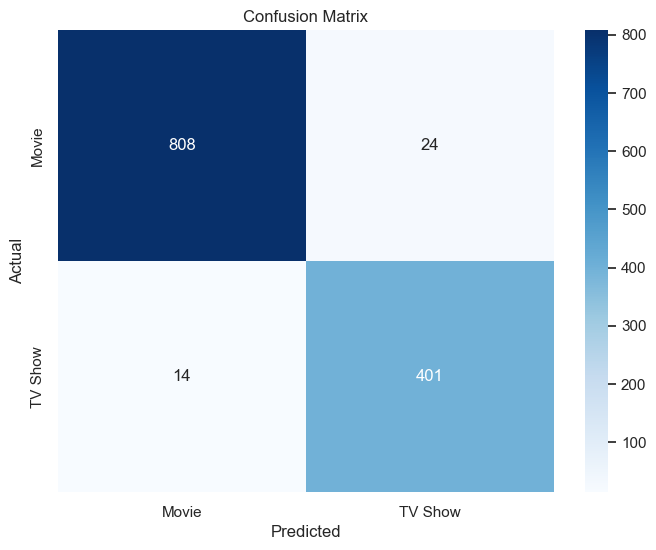

In [86]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix  # Importar métricas de evaluación

# Hacer predicciones usando el conjunto de prueba (X_test)
y_pred = model.predict(X_test)

# Calcular la exactitud del modelo (porcentaje de predicciones correctas)
accuracy = accuracy_score(y_test, y_pred)

# Calcular la precisión para la clase 'Movie' (de todas las veces que predijo 'Movie', cuántas fueron correctas)
precision = precision_score(y_test, y_pred, pos_label='Movie')

# Calcular el recall para la clase 'Movie' (de todos los 'Movie' reales, cuántos predijo correctamente)
recall = recall_score(y_test, y_pred, pos_label='Movie')

# Calcular el F1-score (promedio armónico entre precisión y recall)
f1 = f1_score(y_test, y_pred, pos_label='Movie')

# Imprimir los resultados con 4 decimales de precisión
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Movie): {precision:.4f}")
print(f"Recall (Movie): {recall:.4f}")
print(f"F1-score (Movie): {f1:.4f}")

# Generar la matriz de confusión para comparar valores predichos vs reales
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión como un mapa de calor
plt.figure(figsize=(8, 6))  # Tamaño de la figura
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',  # 'annot=True' muestra los números, 'fmt=d' formatea como enteros
            xticklabels=model.classes_, yticklabels=model.classes_)  # Etiquetas de clases
plt.xlabel('Predicted')  # Etiqueta eje X
plt.ylabel('Actual')     # Etiqueta eje Y
plt.title('Confusion Matrix')  # Título del gráfico
plt.show()  # Mostrar gráfico


¿Cuál es la precisión del clasificador Random Forest?
El modelo obtuvo una precisión global del 96.95% al predecir si un título es una película o una serie de televisión.

¿Cómo rindió el modelo al identificar películas?
La precisión al predecir “Película” fue del 98.30%, con una recuperación del 97.12% y un F1-score del 97.70%.

Conclusiones principales:

El modelo Random Forest es altamente eficaz, con más del 96% de exactitud.

Identifica correctamente la mayoría de películas con muy baja tasa de error.

La matriz de confusión refleja un bajo número de clasificaciones erróneas.

In [92]:
def predecir_nuevo_contenido(nuevos_datos):
    """
    Preprocesa los datos de un nuevo contenido y predice si es una 'Película' o un 'Programa de TV'.

    Parámetros:
      nuevos_datos: Un diccionario con las características del nuevo contenido.

    Retorna:
      El tipo de contenido predicho: 'Movie' o 'TV Show'.
    """
    # Crear un DataFrame con los datos ingresados
    nuevo_df = pd.DataFrame([nuevos_datos])

    # Codificar las variables categóricas con One-Hot Encoding
    nuevo_df_codificado = pd.get_dummies(nuevo_df)

    # Alinear las columnas del nuevo contenido con las del conjunto de entrenamiento
    # Las columnas faltantes se rellenan con 0
    nuevo_df_alineado = nuevo_df_codificado.reindex(columns=X_train.columns, fill_value=0)

    # Predecir el tipo de contenido usando el modelo entrenado
    prediccion = model.predict(nuevo_df_alineado)

    # Retornar el resultado como texto ('Movie' o 'TV Show')
    return prediccion[0]


# Ejemplo de contenido nuevo para predecir
nuevo_contenido = {
    'director': 'Andy Devonshire',
    'cast': 'Mel Giedroyc',
    'country': 'United Kingdom',
    'rating': 'TV-14',
    'listed_in': 'British TV Shows, Reality TV'
}

# Obtener la predicción para el nuevo contenido
tipo_predicho = predecir_nuevo_contenido(nuevo_contenido)

# Mostrar el resultado en pantalla
print(f"El tipo de contenido predicho es: {tipo_predicho}")


El tipo de contenido predicho es: TV Show
